In [2]:
import os
import warnings
from pathlib import Path
from satpy import Scene
from pyresample.geometry import AreaDefinition
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# 1. Rutas
input_file = "inputs/OR_ABI-L2-MCMIPF-M6_G19_s20260030000228_e20260030009547_c20260030010018.nc"
output_dir = Path("output_products")
output_dir.mkdir(exist_ok=True)

# 2. Cargar la Escena
# El reader 'abi_l2_nc' es el correcto para archivos MCMIP de nivel 2
print(f"📦 Cargando archivo NetCDF...")
scn = Scene(filenames=[input_file], reader='abi_l2_nc')

available_composites = scn.available_composite_names()
available_composites

📦 Cargando archivo NetCDF...


['24h_microphysics',
 'airmass',
 'ash',
 'cimss_cloud_type',
 'cimss_cloud_type_raw',
 'cimss_green',
 'cimss_green_sunz',
 'cimss_green_sunz_rayleigh',
 'cimss_true_color',
 'cimss_true_color_sunz',
 'cimss_true_color_sunz_rayleigh',
 'cira_day_convection',
 'cira_fire_temperature',
 'cloud_phase',
 'cloud_phase_distinction',
 'cloud_phase_distinction_raw',
 'cloud_phase_raw',
 'cloudtop',
 'color_infrared',
 'colorized_ir_clouds',
 'convection',
 'day_blowing_snow',
 'day_cloud_type',
 'day_cloud_type_distinction',
 'day_cloud_type_distinction_raw',
 'day_microphysics',
 'day_microphysics_abi',
 'day_microphysics_eum',
 'day_severe_storms',
 'day_severe_storms_tropical',
 'dust',
 'fire_temperature_awips',
 'fog',
 'geo_color',
 'geo_color_background_with_low_clouds',
 'geo_color_high_clouds',
 'geo_color_low_clouds',
 'geo_color_night',
 'green',
 'green_crefl',
 'green_nocorr',
 'green_raw',
 'green_snow',
 'highlight_C14',
 'ir108_3d',
 'ir_cloud_day',
 'land_cloud',
 'land_cloud

In [3]:
import os
import warnings
import sys
from pathlib import Path
from satpy import Scene
from datetime import datetime

warnings.filterwarnings("ignore")

# 1. Rutas y Configuración
input_file = "inputs/OR_ABI-L2-MCMIPF-M6_G19_s20260030000228_e20260030009547_c20260030010018.nc"
output_dir = Path("output_all_products")
output_dir.mkdir(exist_ok=True)

# 2. Cargar la Escena
print(f"📦 [Orchestrator] Cargando escena desde: {input_file}")
scn = Scene(filenames=[input_file], reader='abi_l2_nc')

# Obtener lista completa de compuestos
all_products = scn.available_composite_names()
print(f"🚀 Se detectaron {len(all_products)} productos potenciales.")

# 3. Procesamiento Individual para Respetar Resolución Nativa
# Iteramos uno a uno para liberar memoria tras cada guardado
for product_id in sorted(all_products):
    try:
        start_t = datetime.now()
        print(f"🔄 [{product_id}] Generando...", end="\r")
        
        # Cargamos el producto individualmente
        scn.load([product_id])
        
        # IMPORTANTE: Resampleamos a la resolución nativa específica de este producto
        # Esto evita que un producto de 2km se fuerce a 0.5km o viceversa innecesariamente
        local_scn = scn.resample(resampler='native')
        
        # Nombre de salida
        out_filename = output_dir / f"{product_id}.png"
        
        # Guardar usando el writer de Satpy que maneja el escalado automáticamente
        local_scn.save_datasets(
            writer='simple_image', 
            datasets=[product_id], 
            filename=str(out_filename)
        )
        
        # Descargamos el dataset de la memoria para el siguiente ciclo
        scn.unload(product_id)
        
        duration = (datetime.now() - start_t).total_seconds()
        print(f"✅ [{product_id}] Guardado en {duration:.1f}s")

    except Exception as e:
        print(f"❌ [{product_id}] Error: {str(e)[:100]}...")
        continue

print(f"\n🏁 Proceso finalizado. Revisa la carpeta: {output_dir.absolute()}")

📦 [Orchestrator] Cargando escena desde: inputs/OR_ABI-L2-MCMIPF-M6_G19_s20260030000228_e20260030009547_c20260030010018.nc
🚀 Se detectaron 83 productos potenciales.
✅ [24h_microphysics] Guardado en 8.0s
✅ [airmass] Guardado en 7.7s
✅ [ash] Guardado en 7.4s
✅ [cimss_cloud_type] Guardado en 3.8s
✅ [cimss_cloud_type_raw] Guardado en 3.9s
✅ [cimss_green] Guardado en 2.8s


No sensor name specified in HDF5 file
No sensor name specified in HDF5 file


✅ [cimss_green_sunz] Guardado en 3.1s
✅ [cimss_green_sunz_rayleigh] Guardado en 6.1s
✅ [cimss_true_color] Guardado en 2.4s


No sensor name specified in HDF5 file
No sensor name specified in HDF5 file


✅ [cimss_true_color_sunz] Guardado en 3.5s
✅ [cimss_true_color_sunz_rayleigh] Guardado en 6.0s
✅ [cira_day_convection] Guardado en 6.8s


No sensor name specified in HDF5 file


✅ [cira_fire_temperature] Guardado en 4.0s


No sensor name specified in HDF5 file


✅ [cloud_phase] Guardado en 5.7s
✅ [cloud_phase_distinction] Guardado en 6.8s
✅ [cloud_phase_distinction_raw] Guardado en 3.6s
✅ [cloud_phase_raw] Guardado en 2.4s


No sensor name specified in HDF5 file
No sensor name specified in HDF5 file


✅ [cloudtop] Guardado en 6.3s
✅ [color_infrared] Guardado en 5.8s
✅ [colorized_ir_clouds] Guardado en 4.5s
✅ [convection] Guardado en 6.5s
✅ [day_blowing_snow] Guardado en 3.9s
✅ [day_cloud_type] Guardado en 4.1s
✅ [day_cloud_type_distinction] Guardado en 4.9s


No sensor name specified in HDF5 file


✅ [day_cloud_type_distinction_raw] Guardado en 3.5s
✅ [day_microphysics] Guardado en 3.9s


No sensor name specified in HDF5 file


✅ [day_microphysics_abi] Guardado en 4.3s
✅ [day_microphysics_eum] Guardado en 3.8s
✅ [day_severe_storms] Guardado en 5.5s
✅ [day_severe_storms_tropical] Guardado en 4.8s
✅ [dust] Guardado en 6.6s
✅ [fire_temperature_awips] Guardado en 3.7s


No sensor name specified in HDF5 file
No sensor name specified in HDF5 file


✅ [fog] Guardado en 6.7s


cannot convert float NaN to integer
The following datasets were not created and may require resampling to be generated: DataID(name='geo_color')
The following datasets were not created and may require resampling to be generated: DataID(name='geo_color'), DataID(name='geo_color_background_with_low_clouds')
The following datasets were not created and may require resampling to be generated: DataID(name='geo_color'), DataID(name='geo_color_background_with_low_clouds')
The following datasets were not created and may require resampling to be generated: DataID(name='geo_color'), DataID(name='geo_color_low_clouds'), DataID(name='geo_color_background_with_low_clouds')
The following datasets were not created and may require resampling to be generated: DataID(name='geo_color'), DataID(name='geo_color_low_clouds'), DataID(name='geo_color_night'), DataID(name='geo_color_background_with_low_clouds')
No sensor name specified in HDF5 file


❌ [geo_color] Error: Can't compare areas with different projections....
❌ [geo_color_background_with_low_clouds] Error: Can't compare areas with different projections....
❌ [geo_color_high_clouds] Error: Can't compare areas with different projections....
❌ [geo_color_low_clouds] Error: Can't compare areas with different projections....
❌ [geo_color_night] Error: Can't compare areas with different projections....


No sensor name specified in HDF5 file
The following datasets were not created and may require resampling to be generated: DataID(name='geo_color'), DataID(name='geo_color_low_clouds'), DataID(name='geo_color_night'), DataID(name='geo_color_background_with_low_clouds')


❌ [green] Error: Can't compare areas with different projections....
❌ [green_crefl] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...
❌ [green_nocorr] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...
❌ [green_raw] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...
❌ [green_snow] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...
❌ [highlight_C14] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...
❌ [ir108_3d] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...
❌ [ir_cloud_day] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...
❌ [land_cloud] Error: [Errno -128] NetCDF: At

❌ [natural_color_raw_with_night_ir] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...
❌ [night_fog] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...
❌ [night_ir_alpha] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...


cannot convert float NaN to integer


❌ [night_ir_with_background] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...
❌ [night_ir_with_background_hires] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...
❌ [night_microphysics] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...
❌ [night_microphysics_eum] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...
❌ [night_microphysics_tropical] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...
❌ [overshooting_tops] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...
❌ [overview] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...
❌ [overview_raw] Error: [Errno -128] NetCD

No sensor name specified in HDF5 file


❌ [rocket_plume_day] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...
❌ [rocket_plume_night] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...
❌ [simple_water_vapor] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...
❌ [snow] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...
❌ [snow_fog] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...
❌ [so2] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...
❌ [tropical_airmass] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...


No sensor name specified in HDF5 file


❌ [true_color] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...
❌ [true_color_crefl] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...
❌ [true_color_nocorr] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...
❌ [true_color_raw] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...


No sensor name specified in HDF5 file


❌ [true_color_reproduction] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...
❌ [true_color_reproduction_corr] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...
❌ [true_color_reproduction_uncorr] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...
❌ [true_color_with_night_fires] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...
❌ [true_color_with_night_fires_nocorr] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...
❌ [true_color_with_night_ir] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/home/le...
❌ [true_color_with_night_ir_hires] Error: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/hom

In [12]:
import os
import warnings
import psutil
from pathlib import Path
from satpy import Scene
from datetime import datetime

# --- CONFIGURACIÓN DE ENTORNO ---
os.environ['HDF5_USE_FILE_LOCKING'] = 'FALSE'
warnings.filterwarnings("ignore")

def get_ram_usage():
    """Monitoreo de RAM para tu Legion de 32GB."""
    return psutil.virtual_memory().used / (1024**3)

# 1. RUTAS
input_file = "inputs/OR_ABI-L2-MCMIPF-M6_G19_s20260030000228_e20260030009547_c20260030010018.nc"
output_dir = Path("output_all_products_v051")
output_dir.mkdir(exist_ok=True)

# 2. CARGA DE ESCENA
print(f"📦 [Orchestrator] Iniciando Scene para GOES-19...")
# El motor h5netcdf evita el error -128 del build de NetCDF4
scn = Scene(filenames=[input_file], reader='abi_l2_nc', reader_kwargs={'engine': 'h5netcdf'})

# 3. DETECCIÓN DE ÁREA MANUAL (Evita el ValueError de dataset areas)
print("🔍 Detectando geometría del archivo...")
try:
    # El archivo MCMIP suele usar nombres C01, C02 para sus canales internos
    scn.load(['C02']) 
    master_area = scn['C02'].attrs['area']
    print(f"✅ Área maestra definida desde Banda 02 (0.5km)")
    scn.unload('C02')
except Exception:
    # Fallback si los nombres de los canales varían
    first_ds = scn.all_dataset_names()[0]
    scn.load([first_ds])
    master_area = scn[first_ds].attrs['area']
    print(f"✅ Área maestra definida desde dataset: {first_ds}")
    scn.unload(first_ds)

# 4. LISTADO DE PRODUCTOS
all_products = scn.available_composite_names()
print(f"🚀 Se detectaron {len(all_products)} productos potenciales.")

# 5. BUCLE DE PROCESAMIENTO
# Procesamos uno por uno para asegurar que tus 32GB de RAM no se saturen
for product_id in sorted(all_products):
    try:
        # Excluimos los que necesitan plugins de terceros o descargas NASA (BlackMarble)
        if any(x in product_id for x in ["cimss", "cira", "geo_color"]):
            continue

        start_t = datetime.now()
        print(f"👉 [{product_id}] Procesando...", end="\r")
        
        # Carga y Resampling
        scn.load([product_id])
        local_scn = scn.resample(master_area)
        
        # Guardado con mejora de contraste automática
        out_filename = output_dir / f"{product_id}.png"
        local_scn.save_datasets(
            writer='simple_image', 
            datasets=[product_id], 
            filename=str(out_filename),
            enhance=True 
        )
        
        # Liberar memoria tras cada iteración
        scn.unload(product_id)
        
        duration = (datetime.now() - start_t).total_seconds()
        print(f"✅ [{product_id}] {duration:.1f}s | RAM: {get_ram_usage():.2f} GB")

    except Exception as e:
        msg = str(e).split('\n')[0]
        print(f"❌ [{product_id}] Error: {msg[:60]}...")
        try: scn.unload(product_id)
        except: pass
        continue

print(f"\n🏁 PROCESO FINALIZADO. Resultados en: {output_dir.absolute()}")

📦 [Orchestrator] Iniciando Scene para GOES-19...
🔍 Detectando geometría del archivo...
✅ Área maestra definida desde Banda 02 (0.5km)
🚀 Se detectaron 83 productos potenciales.
✅ [24h_microphysics] 7.3s | RAM: 18.11 GB
✅ [airmass] 6.8s | RAM: 18.05 GB


No sensor name specified in HDF5 file


✅ [ash] 6.8s | RAM: 18.06 GB


No sensor name specified in HDF5 file


✅ [cloud_phase] 5.3s | RAM: 18.64 GB
✅ [cloud_phase_distinction] 6.6s | RAM: 18.34 GB
✅ [cloud_phase_distinction_raw] 3.5s | RAM: 18.37 GB
✅ [cloud_phase_raw] 2.3s | RAM: 18.29 GB


No sensor name specified in HDF5 file
No sensor name specified in HDF5 file


✅ [cloudtop] 6.1s | RAM: 18.23 GB
✅ [color_infrared] 5.6s | RAM: 18.66 GB
✅ [colorized_ir_clouds] 4.2s | RAM: 18.50 GB
✅ [convection] 6.2s | RAM: 18.25 GB
✅ [day_blowing_snow] 4.0s | RAM: 18.20 GB
✅ [day_cloud_type] 4.2s | RAM: 18.16 GB
✅ [day_cloud_type_distinction] 4.9s | RAM: 18.20 GB


No sensor name specified in HDF5 file


✅ [day_cloud_type_distinction_raw] 3.5s | RAM: 18.27 GB
✅ [day_microphysics] 3.8s | RAM: 18.18 GB


No sensor name specified in HDF5 file


✅ [day_microphysics_abi] 4.2s | RAM: 18.17 GB
✅ [day_microphysics_eum] 3.7s | RAM: 18.19 GB
✅ [day_severe_storms] 5.5s | RAM: 18.17 GB
✅ [day_severe_storms_tropical] 4.8s | RAM: 18.24 GB
✅ [dust] 6.5s | RAM: 18.25 GB
✅ [fire_temperature_awips] 3.8s | RAM: 18.32 GB


No sensor name specified in HDF5 file
No sensor name specified in HDF5 file


✅ [fog] 6.8s | RAM: 18.49 GB
✅ [green] 4.8s | RAM: 18.89 GB
❌ [green_crefl] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [green_nocorr] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [green_raw] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [green_snow] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [highlight_C14] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [ir108_3d] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [ir_cloud_day] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [land_cloud] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [land_cloud_fire] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [natural_color] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [natural_color_nocorr] Error: [Errno -128] NetCDF: Attempt to use

cannot convert float NaN to integer


❌ [night_ir_with_background] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [night_ir_with_background_hires] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [night_microphysics] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [night_microphysics_eum] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [night_microphysics_tropical] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [overshooting_tops] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [overview] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [overview_raw] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...


No sensor name specified in HDF5 file


❌ [rocket_plume_day] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [rocket_plume_night] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [simple_water_vapor] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [snow] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [snow_fog] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [so2] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [tropical_airmass] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...


No sensor name specified in HDF5 file
No sensor name specified in HDF5 file


❌ [true_color] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [true_color_crefl] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [true_color_nocorr] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [true_color_raw] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [true_color_reproduction] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [true_color_reproduction_corr] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [true_color_reproduction_uncorr] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...


cannot convert float NaN to integer


❌ [true_color_with_night_fires] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [true_color_with_night_fires_nocorr] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [true_color_with_night_ir] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [true_color_with_night_ir_hires] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [volcanic_emissions] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [water_vapors1] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...
❌ [water_vapors2] Error: [Errno -128] NetCDF: Attempt to use feature that was not tur...

🏁 PROCESO FINALIZADO. Resultados en: /home/legion/bulk/MAIE_tesis2026/f01_code/MAIE_tesis_github/notebooks02/mcmip_products/output_all_products_v051


📦 Generando PNG nativo con Satpy...
🎨 Procesando el PNG para detectar colores...
✅ Proceso finalizado. Archivo: output_v056/solo_nubes_colores.png


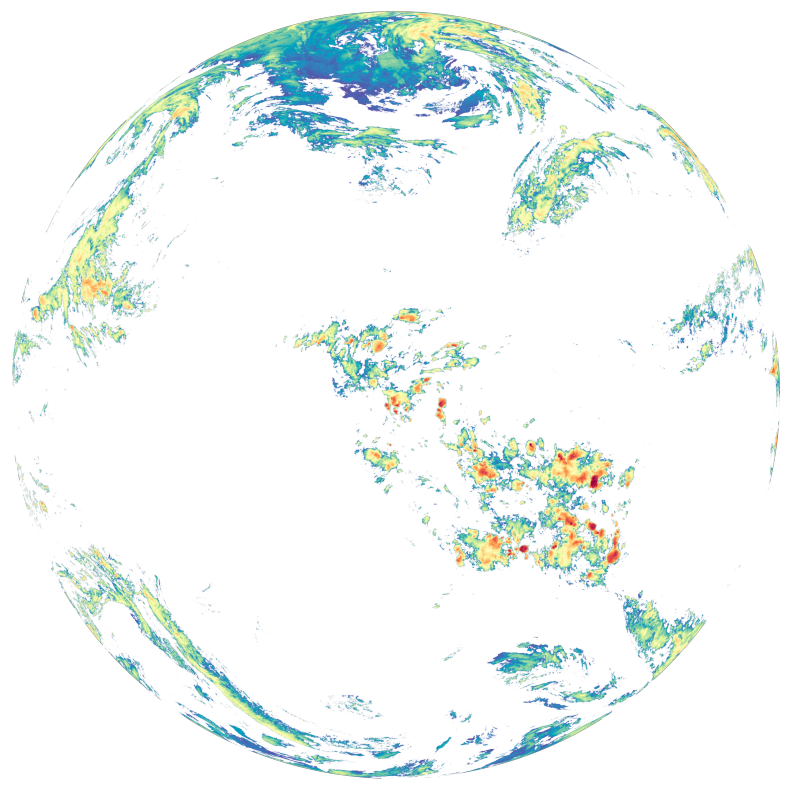

In [21]:
import os
import numpy as np
from pathlib import Path
from satpy import Scene
from PIL import Image
import matplotlib.pyplot as plt

# --- 1. CONFIGURACIÓN Y GENERACIÓN NATIVA ---
input_file = "inputs/OR_ABI-L2-MCMIPF-M6_G19_s20260030000228_e20260030009547_c20260030010018.nc"
output_dir = Path("output_v056")
output_dir.mkdir(exist_ok=True)

temp_png = output_dir / "temp_satpy_native.png"

print("📦 Generando PNG nativo con Satpy...")
scn = Scene(filenames=[input_file], reader='abi_l2_nc', reader_kwargs={'engine': 'h5netcdf'})
product_id = 'colorized_ir_clouds'
scn.load([product_id])
local_scn = scn.resample(scn.finest_area())

# Guardamos el PNG tal cual lo genera Satpy con su realce por defecto
local_scn.save_datasets(writer='simple_image', datasets=[product_id], 
                        filename=str(temp_png), enhance=True)

# --- 2. PROCESAMIENTO DEL PNG PARA TRANSPARENCIA ---
print("🎨 Procesando el PNG para detectar colores...")

# Abrimos la imagen guardada y la convertimos a array de numpy (R, G, B)
img = Image.open(temp_png).convert("RGB")
data = np.array(img).astype(float) / 255.0

# Lógica de detección: En el producto colorized_ir_clouds:
# Las nubes frías tienen colores vivos (R, G, B son diferentes entre sí).
# El suelo y nubes cálidas son grises (R, G, B son casi idénticos).

# Calculamos la saturación simple: la diferencia entre el canal máximo y el mínimo
# Si max - min > 0, hay color.
diff = np.max(data, axis=2) - np.min(data, axis=2)

# Definimos un umbral de "color" (0.05 es muy sensible, captará cualquier rastro de color)
threshold = 0.05
mask = diff > threshold

# Creamos la nueva imagen RGBA
# Empezamos con la imagen original
rgba = np.zeros((data.shape[0], data.shape[1], 4))
rgba[:,:,:3] = data

# El canal Alfa (transparencia) será nuestra máscara
# Donde hay color es 1 (opaco), donde es gris es 0 (transparente)
rgba[:,:,3] = mask.astype(float)

# --- 3. GUARDADO Y VISUALIZACIÓN ---
final_output = output_dir / "solo_nubes_colores.png"
final_img = Image.fromarray((rgba * 255).astype(np.uint8))
final_img.save(final_output)

print(f"✅ Proceso finalizado. Archivo: {final_output}")

# Visualización rápida
plt.figure(figsize=(10, 10))
plt.imshow(rgba)
#plt.title("Capa de nubes aislada (Transparente)")
plt.axis('off')
plt.show()